# Starting

In [6]:
# @title
#!git clone https://github.com/the-codingschool/doubleSlit.git
#from doubleSlit.doubleSlit import doubleSlit, waveFunction

import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()



class baby():
  def __init__(self,age=0, mood="crying", hunger="hungry"):
    self.age = age
    self.mood = mood
    self.hunger = hunger
  def feed(self):
    self.hunger = "full"
  def play(self):
    self.mood = "happy"

class plant():
  def __init__(self):
    self.planted = 0
    self.day_of_last_growth = 0
    self.day = 0
    self.water = 0
    self.light = 0
    self.health = 10
    self.stage = 0
    self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
    self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])

  def water_plant(self,amount):
    if amount > 0:
      print("You watered your plant.")
      self.water += round(amount)
    elif amount < 0:
      raise ValueError("You can't remove water from your plant! You will have to wait a bit for it to dry out.")
    else:
      print("You decided to not water your plant.")

  def set_light(self,level):
    if level <0:
      raise ValueError("You can't set the light level to negative values.")
    elif level > 10:
      raise ValueError("Your light is not that strong")
    else:
      self.light = round(level)
      print("You set the light to level " + str(self.light))

  def check_health(self):
    print("Your plant's health is a " + str(self.health)+ "/" + str(10+(5*self.stage))+".")
    print("If you had to rate the wetness of the soil, it would be a " + str(self.water)+ "/10.")
    print("Your light is turned up to " + str(self.light)+ ".")
    if self.stage == 10:
      print("Your plant is full grown.")

  def wait(self,num_days):
    for i in range(num_days):

      self.day += 1
      print('Day ' + str(self.day))
      if self.perfect_light > self.light:
        print("Your plant needs more light")
        self.health += -1*abs(self.perfect_light- self.light)/10
      elif self.perfect_light < self.light:
        print("Your plant needs less light")
        self.health += -1*abs(self.perfect_light- self.light)/10
      else:
        print("Your plant looks happy with the light it has.")
      if self.perfect_water > self.water:
        print("Your plant needs more water")
        self.health += -1*abs(self.perfect_water- self.water)/10
      elif self.perfect_water < self.water:
        print("Your plant needs less water")
        self.health += -1*abs(self.perfect_water- self.water)/10
      else:
        print("Your plant looks happy with the water it had.")
      if self.perfect_light == self.light and self.perfect_water == self.water:
        self.health = (self.health + 10+(5*self.stage))/2
        if self.day- self.day_of_last_growth >= 5 and self.stage < 10:
          print("Your plant grew a bit! Its preferances may have changed.")
          self.stage += 1
          self.health += 5
          self.day_of_last_growth = self.day
          self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
          self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
          if self.stage == 10:
            print("Congrats! Your plant is full grown.")
      self.water += -1*self.light
      if self.water < 0:
        self.water = 0
      if self.health <= 0:
        print("Your plant died! You decide to plant a new seed. Treat this one better!")
        self.planted = 0
        self.day_of_last_growth = 0
        self.day = 0
        self.water = 0
        self.light = 0
        self.health = 10
        self.stage = 0
        self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
        self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])

      print('\n')

# Part 2: Using the Double Slit Experiment Simulator

---

In this part,I am going to show you, how to use the double slit experiment simulator.

**#  Problem #2.1**

Together, create a doubleSlit object using its associated function. All of its arguments are optional, so you do not need to put anything in the parentheses yet.

In [2]:
# COMPLETE THIS CODE

In [7]:
my_experiment = doubleSlit()

# Problem #2.2**

Together, use the appropriate method of the doubleSlit object to display the screen.

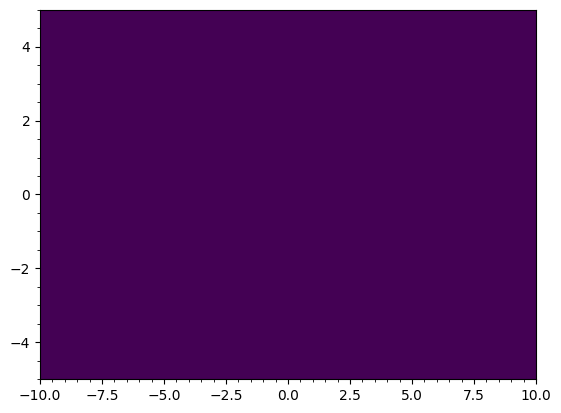

In [8]:
my_experiment.show_screen()

# Problem #2.3**


Together, use the appropriate method of the doubleSlit object to fire a single electron at the screen. Then, display the screen again.

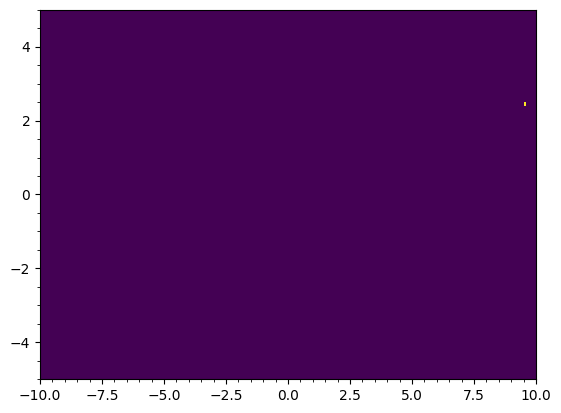

In [9]:
my_experiment.fire_electron()
my_experiment.show_screen()

# **Problem #2.4**

Together, create a doubleSlit object so that you measure which slit the electron passes through. Then, fire an electron and display the screen.

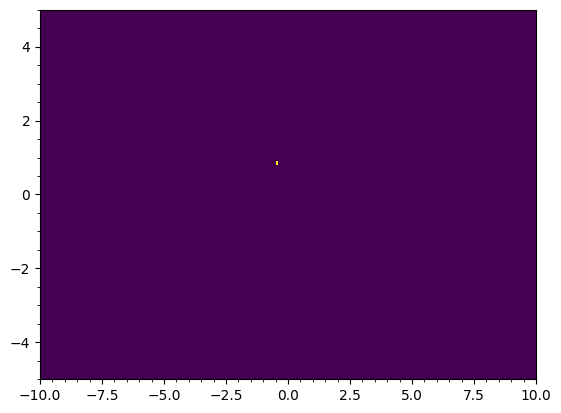

In [10]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.fire_electron()
my_experiment.show_screen()

In [ ]:
#OR

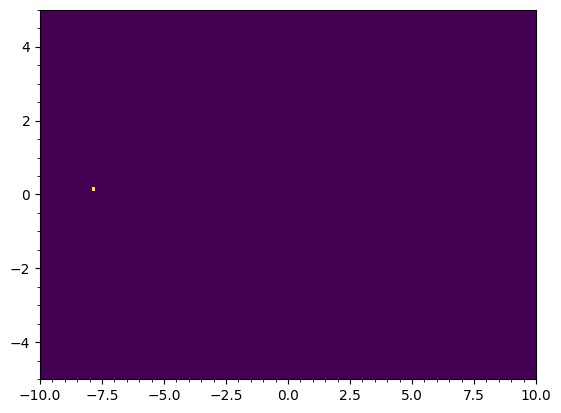

In [11]:
my_experiment = doubleSlit()
my_experiment.measure_slit=True
my_experiment.fire_electron()
my_experiment.show_screen()

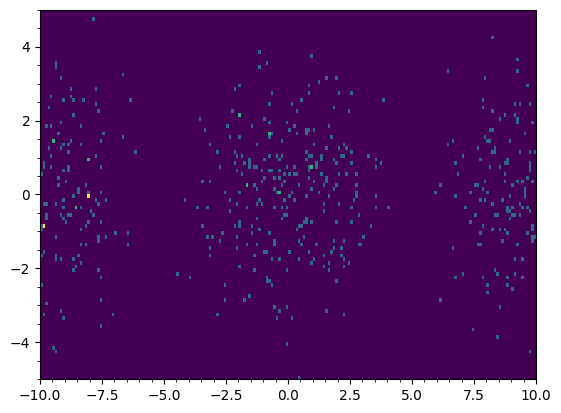

In [12]:
my_experiment = doubleSlit()
my_experiment.electron_beam(num_electrons=500)    #use the appropriate method to fire 500 electrons at the screen. Then, display the screen.
my_experiment.show_screen()

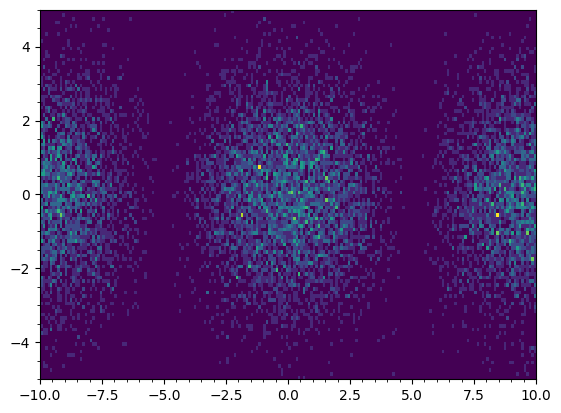

In [13]:
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()                              #use the appropriate method to fire 10,000 electrons at the screen. Then, display the screen.

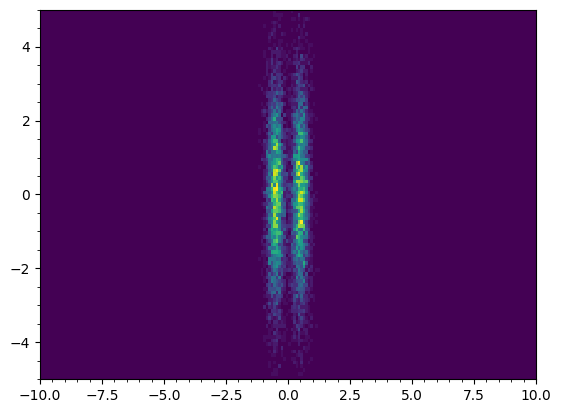

In [14]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()  #create a doubleSlit object so that you measure which slit the electron passes through. Then, fire 10000 electrons and display the screen.

# Part 3: Modifying the Double Slit Experiment Simulator

---

We will see how certain modifications to the doubleSlit object affect the interference pattern shown on the screen.

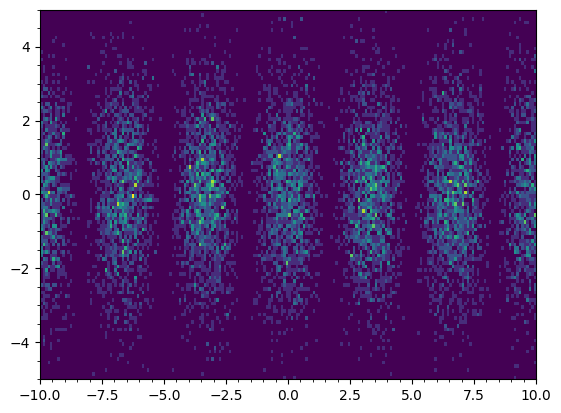

In [18]:
my_experiment = doubleSlit()
my_experiment.slit_dist=3
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

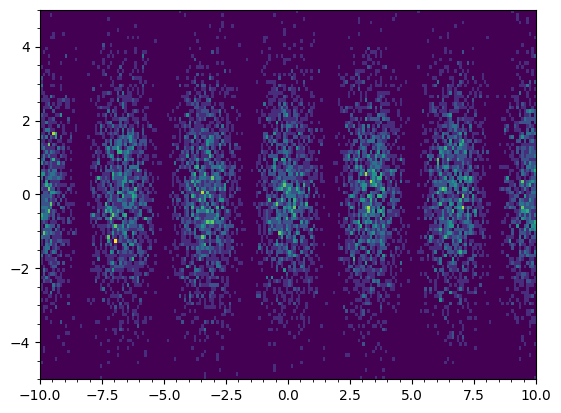

In [19]:
my_experiment = doubleSlit(slit_dist=3)
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

# Problem #3.3
Independently, create a doubleSlit object with a slit distance of 6, and fire an electron beam of 10,000 electrons. How do you expect this to compare to the slit distance of 3?

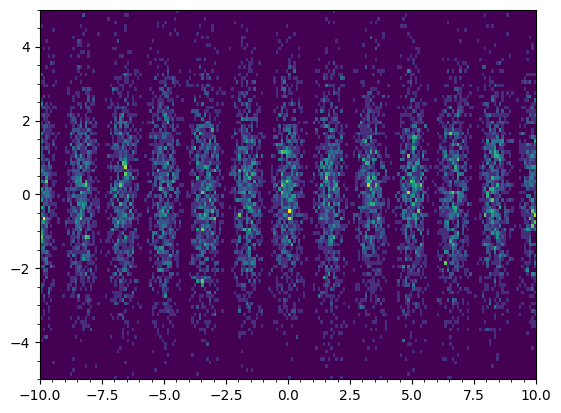

In [20]:
my_experiment = doubleSlit(slit_dist=6)
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

In [ ]:
#create a doubleSlit object with a slit distance of 50, and fire an electron beam of 10,000 electrons.

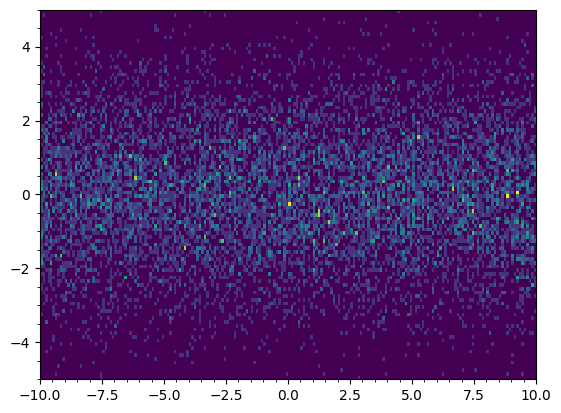

In [21]:
my_experiment = doubleSlit(slit_dist=50)
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

In [ ]:
#explore how changing the distance between the slits changes the interference patters. For what range of slit distances do you see an interference pattern? Print the range that you find. Note: Do not measure the slit.

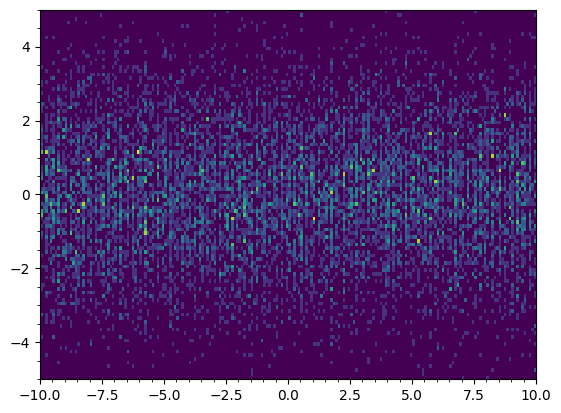

0.7-40


In [22]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 40
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print("0.7-40")  #Approximately

In [ ]:
#The plot shown below was generated with a distance_to_screen of 20. What slit_dist was used?

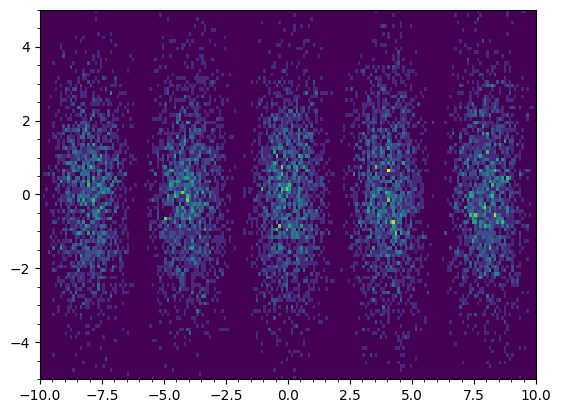

In [23]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.distance_to_screen = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#3.8 [CHALLENGE]

Independently, search through the documentation to find a way to create a histogram of the x coordinates of the detections. Then, create a doubleSlit object with a slit_dist of 3, fire 5,000 electrons at the screen, the display a histogram of the detections. Print the distance between the bright spots on the screen.

In [24]:
print("~3.5")

~3.5


Problem #3.9 [CHALLENGE]
Independently, modify the code from problem #1.6 to find the distances between bright spots for the following slit distances:

1

1.5

2

5

10

20
Record your results in the list bright_spot_distances, then run the code below to produce a line graph.

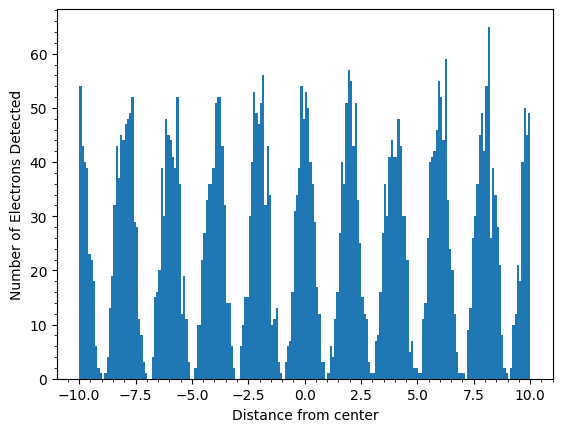

In [25]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

Text(0, 0.5, 'Distance Between Bright Spots in Interference Pattern')

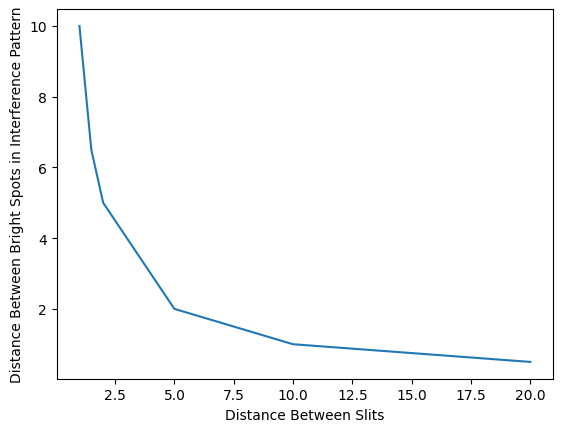

In [26]:
slit_distances = [1,1.5,2,5,10,20]
bright_spot_distances = [10,6.5,5,2,1,0.5]

plt.plot(slit_distances,bright_spot_distances)
plt.xlabel("Distance Between Slits")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

# Part 4.1: The Double Slit Simulator

---
Problem #4.1.1
Complete the code below to:

1.Create a doubleSlit object with a slit distance of 5.

2.Then, use the appropriate method of the doubleSlit object to fire two electrons at the screen.

3.Lastly, display the screen.


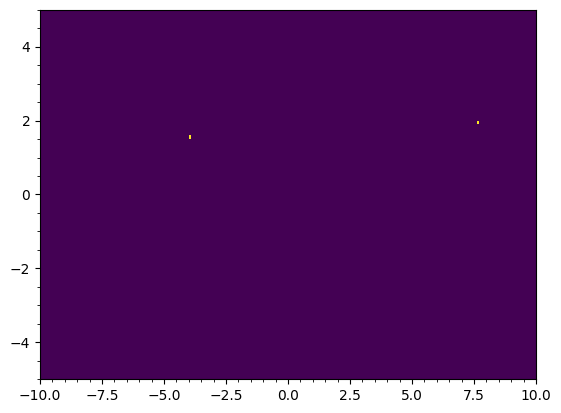

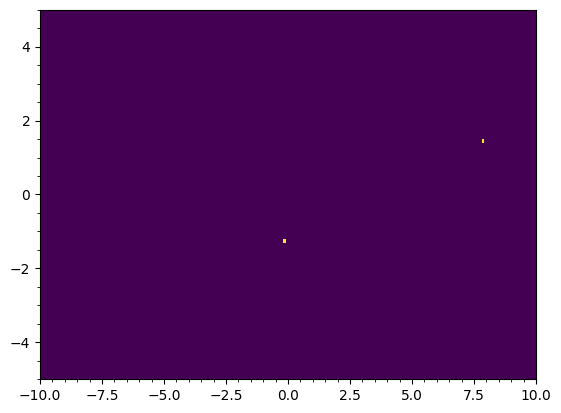

In [27]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5

my_experiment.clear_screen()
my_experiment.fire_electron()
my_experiment.fire_electron()

my_experiment.show_screen()

#OR

my_experiment = doubleSlit(slit_dist = 5)
my_experiment.electron_beam(num_electrons=2)
my_experiment.show_screen()